This is the python code that uses Movies IMDB database as input. We have got this dataset from Kaggle. Refer to this link for more information on Dataset : https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub

Since we have already received the dataset after its cleaned already, this input doesnt require any Data Cleaning phase as its already done. 

With this input I am trying to answer below listed questions using Python packages like Numpy, Pandas and visualization
packages like matplotlib. 

Brief about Movies IMDB Dataset : 
      This input dataset I have taken is having details about list of all the movies taken from 1960 till 2010 by listed Production Companies. For those movies we have details on who directed those movies, whats the budget and revenue got out of those movies. 
      
Problem of statement : Based on the various data of movies, I will be working on this data to answer below questions.  

Questions are to be explored and answered : 
1. How have movie genres changed over time ?
2. How do top few directors have performed over a period ? 


To get into that answer, I will be analysing more on data in various perspective. For that first data has to be cleaned and then wrangled to get the data ready for exploration. I will be using Python Pandas, numpy packages to help me doing these steps. 
Once the data is ready, we can start exploring it by creating various Data Visualization using matplotlib. Based on the outcome of the chart, I will comeup with a conclusion which will answer these two questions. Also pls refer to Markdown cells after every charts to see my conclusion about the charts and answers to my questions. 

Declaration of Packages and Reading the data using Pandas. 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("tmdb-movies.csv")
#print(df.head(10))

DATA WRANGLING PHASE : 

Lets take the first question to explore which is about Genre's performance. For that we need Genres, Revenue generated by those movies. If we see the genre field, each movie has involved into more than one genre. To understand about Genre, we have to remove '|' from the genre field and seperate out all the genres.  

In [21]:
df2 = df['genres'].str.split('|', expand = True)

df2.columns = ['genre1','genre2','genre3','genre4','genre5']

df = pd.concat([df,df2], axis = 1)

df = df.drop(['genre4','genre5','genres'],axis=1)


In [22]:
df3 = pd.melt(df,id_vars = ['id','imdb_id','popularity','budget','revenue',
                          'original_title','cast','homepage','director','tagline',
                           'keywords','overview','runtime','production_companies',
                           'release_date','vote_count','vote_average','release_year',
                           'budget_adj','revenue_adj'] , value_vars = ['genre1','genre2','genre3'])


df3 = df3.drop(['variable','imdb_id','original_title','homepage','tagline','keywords','overview'], axis = 1)

df3 = df3.rename(columns = {'value':'genre'})

print(len(df3))

32598


In [23]:
df3 = df3.dropna()
print(len(df3))

22298


In [24]:
print(df3[df3['id']==135397])

           id  popularity     budget     revenue  \
0      135397   32.985763  150000000  1513528810   
10866  135397   32.985763  150000000  1513528810   
21732  135397   32.985763  150000000  1513528810   

                                                    cast         director  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
10866  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
21732  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   

       runtime                               production_companies  \
0          124  Universal Studios|Amblin Entertainment|Legenda...   
10866      124  Universal Studios|Amblin Entertainment|Legenda...   
21732      124  Universal Studios|Amblin Entertainment|Legenda...   

      release_date  vote_count  vote_average  release_year    budget_adj  \
0           6/9/15        5562           6.5          2015  1.379999e+08   
10866       6/9/15        5562           6.5         

In [25]:
print(df3.describe())

                  id    popularity        budget       revenue       runtime  \
count   22298.000000  22298.000000  2.229800e+04  2.229800e+04  22298.000000   
mean    58305.805722      0.740588  1.820413e+07  4.985756e+07    103.278814   
std     87016.712241      1.127051  3.481715e+07  1.344653e+08     27.472853   
min         5.000000      0.000188  0.000000e+00  0.000000e+00      0.000000   
25%     10012.000000      0.244800  0.000000e+00  0.000000e+00     91.000000   
50%     17190.000000      0.437051  1.000000e+06  0.000000e+00    100.000000   
75%     57211.500000      0.823411  2.150000e+07  3.584190e+07    113.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    877.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  22298.000000  22298.000000  22298.000000  2.229800e+04  2.229800e+04  
mean     266.023007      5.957341   2000.496323  2.183455e+07  6.420090e+07  
std      655.485745      0.900611     12.9682

EXPLORATORY DATA ANALYSIS PHASE : 

Plot a chart that shows how genres have moved over a period of time. There is a long list of genres in the industry and to narrow down the exploration, I am restricting my analysis to popular genre. 

Lets first find the most popular genres over a period of 1960s to 2010. 
In the list of genres, we will take first 3 most popular and then plot a chart of how those three genres are performing for
the given period of time. 

There are many ways to find the performance from this dataset itself. To give a limitation so that we can draw a boundary for our analysis. Unless we draw a limitation, analysis will be too broad and go on and on without any direction. To avoid that , Lets take two properties to our analysis. I have taken Number of movie count for the genres and Revenue generated out of it. 

In [26]:
genre_count = df3.groupby(['genre'])['genre'].count()

genre_count = genre_count.sort_values(ascending = False)

genre_count = pd.DataFrame(genre_count)

genre_count.columns = ['count']

genre_count = genre_count.reset_index()

print(genre_count)

              genre  count
0             Drama   4231
1            Comedy   3341
2          Thriller   2209
3            Action   2188
4            Horror   1481
5           Romance   1341
6         Adventure   1309
7             Crime   1135
8            Family    879
9   Science Fiction    870
10          Fantasy    702
11          Mystery    626
12        Animation    608
13      Documentary    316
14            Music    295
15          History    263
16              War    197
17          Western    119
18         TV Movie     97
19          Foreign     91


In [27]:
genre_by_revenue = df3.groupby(['genre'])['revenue_adj'].sum()

genre_by_revenue = genre_by_revenue.sort_values(ascending = False)

genre_by_revenue = pd.DataFrame(genre_by_revenue)

genre_by_revenue.columns = ['Revenue']

genre_by_revenue = genre_by_revenue.reset_index()

print(genre_by_revenue)

              genre       Revenue
0            Action  2.125990e+11
1         Adventure  1.963552e+11
2             Drama  1.858210e+11
3            Comedy  1.681823e+11
4          Thriller  1.219005e+11
5           Fantasy  8.266913e+10
6            Family  8.091476e+10
7   Science Fiction  7.708234e+10
8           Romance  6.661646e+10
9             Crime  6.456833e+10
10        Animation  5.715556e+10
11           Horror  3.750864e+10
12          Mystery  3.011699e+10
13            Music  1.493338e+10
14          History  1.436936e+10
15              War  1.354096e+10
16          Western  5.895258e+09
17      Documentary  1.112954e+09
18          Foreign  1.512923e+08
19         TV Movie  5.838910e+07


We have data ready for our visualization. Visualizing a data makes more meaningful and help us draw a logical conclusion rather than going through the data row by row. Having said that we also have to be careful in deciding the chart. Not all the charts give us meaningful information. 


Our aim is now to show visually top 3 genres based on movie count and revenue generated with it. For this I have chosen Horizontal bar plot. I will be using same plot for both Movie count as well as Revenue generated. That way comparison is more easier. Below are the two Horizontal bar plot that gives the Genre in the descending order. 

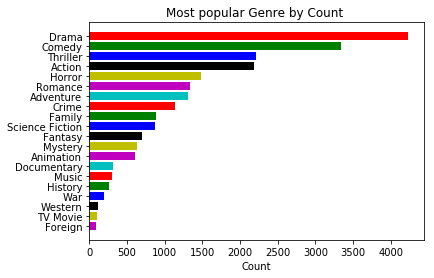

In [29]:
fig, ax = plt.subplots()

y_pos = np.arange(len(genre_count['genre']))

ax.barh(y_pos, genre_count['count'],  align='center', color = 'rgbkymc' ,ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(genre_count['genre'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Most popular Genre by Count ')
plt.show()

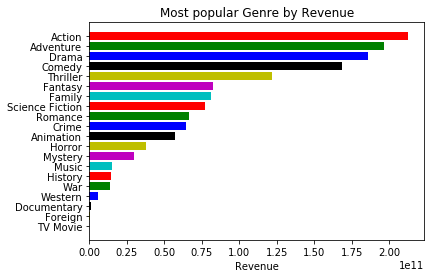

In [30]:
fig, ax = plt.subplots()

y_pos = np.arange(len(genre_by_revenue['genre']))

ax.barh(y_pos, genre_by_revenue['Revenue'],  align='center', color = 'rgbkymc' ,ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(genre_by_revenue['genre'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Revenue')
ax.set_title('Most popular Genre by Revenue')
plt.show()

For my analysis purpose, lets take Action, Drama and Comedy  from the top list. 
The reason why i have chosen these three genre is, based on number of movie count as well as revenue generated Drama and Comedy 
took first 4 places. Thats general liking of the public. 
Though adventure is in the top revenue generated, number of movies is very low. That way Action Genre has better balance between Revenue generation as well as Movie Count. 
Going forward all my analysis will be on these three genre to answer my first question. 

Lets get the data ready to plot the three genres based on the count over the period of time. 

DATA WRANGLING PHASE : 

In [32]:
df4 = df3[(df3['genre'] == 'Action') | (df3['genre'] == 'Comedy') | (df3['genre'] == 'Drama')]

df4_genre_count = df4.groupby(['genre','release_year'])['genre'].count()

df4_genre_count = pd.DataFrame(df4_genre_count)

df4_genre_count.columns = ['count']

df4_genre_count = df4_genre_count.reset_index()

df4_Action = df4_genre_count[df4_genre_count['genre'] == 'Action']

df4_Drama = df4_genre_count[df4_genre_count['genre'] == 'Drama']

df4_Comedy = df4_genre_count[df4_genre_count['genre'] == 'Comedy']



EXPLORATORY DATA ANALYSIS PHASE :

We have now all the required data for the top three genres which we picked for our Analysis. Nex step is to find out how these three genres were performed. Performance is always a measure of difference. In the sense, we say performance by comparing any property with previous time period. It could be any range of properties and any range of time period. 


For our Analysis, I have chosen a scatter / bubble plot. The reason why I have chosen bubble plot is I can go upto three Dimensional view of my data. Year will be in the x-axis so that i can show how genre varies year on year with the Movie count/revenue in the y-axis. To show visually if the count/revenue has increased or not , I have used Bubble size as count/revenue value. That way my bubble gets increased or decreased based on the value. 

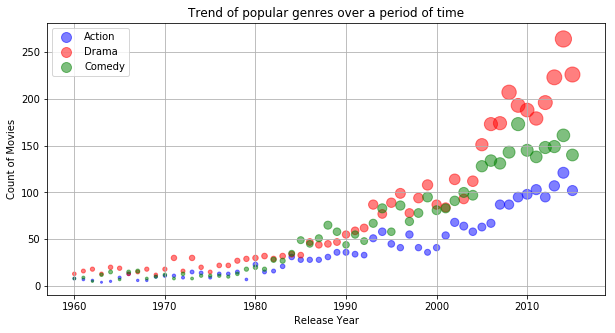

In [34]:
fig, ax = plt.subplots(figsize=(10,5))

x = df4_Action['release_year']

y = df4_Action['count']

plt.scatter(x, y, s = df4_Action['count'] , c = 'b', label = 'Action', alpha=0.5)

x = df4_Drama['release_year']

y = df4_Drama['count']

plt.scatter(x, y, s = df4_Drama['count'] , c = 'r', label = 'Drama', alpha=0.5)

x = df4_Comedy['release_year']
y = df4_Comedy['count']


plt.scatter(x, y, s = df4_Comedy['count'] , c = 'g', label = 'Comedy', alpha=0.5)

ax.legend()

ax.grid(True)

lgnd = plt.legend()

lgnd.legendHandles[0]._sizes = [100]

lgnd.legendHandles[1]._sizes = [100]

lgnd.legendHandles[2]._sizes = [100]

plt.xlabel("Release Year")

plt.ylabel("Count of Movies")

plt.title("Trend of popular genres over a period of time")

plt.show()

Above chart shows three different genres plotted over the period from 1960 to 2010. Three colours are showing three genres. 
Scatter plot has been made to show how count increased as the year passed.

Lets analyse the above chart further. Overall the number of movies got released are increased  year on year. Its not a steep increase in the numbers but has grown in a steady rate. We can see from the above chart, that all these years Drama always take up the higher place when compare to Action and Comedy. Action is still moved in a steady manner when compare to Drama and Comedy. 

After 2000, more and more movies came up in Drama and Comedy. We can say more producer and directors came up with most popular and demanding genre or vice versa too works out that as more and more movies of these two genres came up viewers start showing more interest. This conclusion is again only with the number of movies released all these years. We cant comeup with any analysis if they produced similar pace of revenue or profit. That requires more analysis with different set of data and difference visuals. 


DATA WRANGLING PHASE  : 

In [36]:
df5_genre_revenue = df4.groupby(['genre','release_year'])['revenue_adj'].sum()

df5_genre_revenue = pd.DataFrame(df5_genre_revenue)

df5_genre_revenue.columns = ['Revenue']

df5_genre_revenue = df5_genre_revenue.reset_index()

df5_Action =  df5_genre_revenue[df5_genre_revenue['genre'] == 'Action']

df5_Drama =   df5_genre_revenue[df5_genre_revenue['genre'] == 'Drama']

df5_Comedy = df5_genre_revenue[df5_genre_revenue['genre'] == 'Comedy']


EDA PHASE :

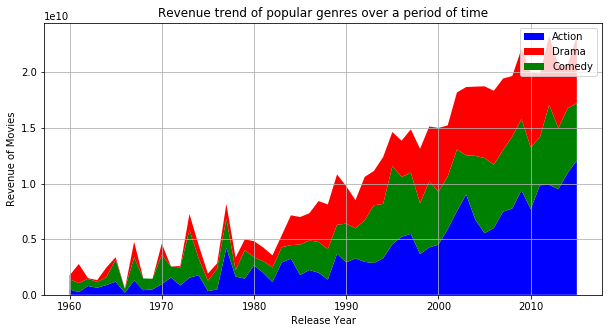

In [37]:
fig, ax = plt.subplots(figsize=(10,5))

x = df5_Action['release_year']

y = df5_Action['Revenue']

x1 = df5_Drama['release_year']

y1 = df5_Drama['Revenue']

x2 = df5_Comedy['release_year']

y2 = df5_Comedy['Revenue']


plt.stackplot(x, y, x1, y1, x2, y2, labels = ["Action","Drama","Comedy"], colors = ['blue','r','green'])

ax.grid(True)

ax.legend()

plt.xlabel("Release Year")

plt.ylabel("Revenue of Movies")

plt.title("Revenue trend of popular genres over a period of time")

plt.show()

We can see the same evidence in Revenue also like Count showed above. 

Overall Revenue returned has been increased steadily from 1960 to 2010 for all the three genres. Revenuewise we can say Drama and Comedy takeup the top most place. Here also its directors/producers choice based on public choise or viceversa. 

We can also go further and predict how these three genres will perform in the coming years. We can dig more and more on this data to come to various conclusions on various properties and measures. 

Consider the purpose of our analysis, we limit ourselves within these two paramters and make the conclusions. 
        

Lets move on to our next analysis on Director. Here also I have taken the similar path of taking the top few directors based on two parameters and see who is the people's director. 

Lets plot charts to find the top 10 directors in Revenue generation and how they are popular among public. Again I have chosen the same horizontal bar plot to list down the top 10 directors based on revenue generated by their movies as well as public vote. 

For this, lets first prepare the data to pull out Revenue of all the directors and then plot the top 10 directors who 
generated highest Revenue.

Pick those Top 10 directors and find out the public vote they could earn and find who is best among those top 10.

In [38]:
df6 = df3[['director','vote_count','revenue_adj']]

df6 = df6.groupby(['director'])['revenue_adj'].sum()

df6 = df6.sort_values(ascending = False)

df6 = pd.DataFrame(df6)

df6.columns = ['revenue']

df6 = df6.reset_index()

df7 = df3[['director','vote_count','revenue_adj']]

df7 = df7.groupby(['director'])['vote_count'].sum()

df7 = df7.sort_values(ascending = False)

df7 = pd.DataFrame(df7)

df7.columns = ['vote_count']

df7 = df7.reset_index()


In [39]:
print(df7.describe())

          vote_count
count    4505.000000
mean     1316.710544
std      5096.228852
min        10.000000
25%        39.000000
50%       118.000000
75%       543.000000
max    122992.000000


EDA PHASE : 



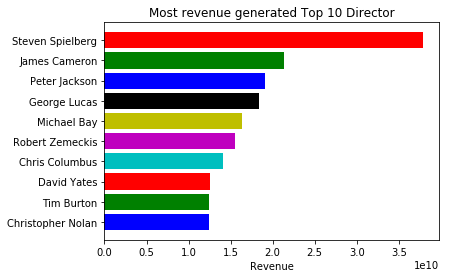

In [40]:
fig, ax = plt.subplots()

df6_Top10 = df6.head(10)

y_pos = np.arange(len(df6_Top10['director']))

ax.barh(y_pos, df6_Top10['revenue'],  align='center', color = 'rgbkymc' ,ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(df6_Top10['director'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Revenue')
ax.set_title('Most revenue generated Top 10 Director')
plt.show()

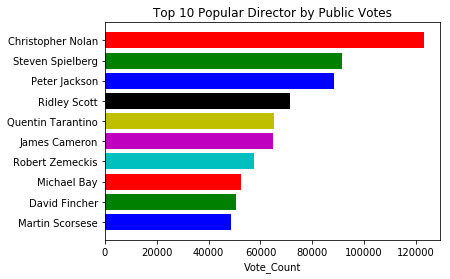

In [41]:
fig, ax = plt.subplots()

df7_Top10 = df7.head(10)

y_pos = np.arange(len(df7_Top10['director']))

ax.barh(y_pos, df7_Top10['vote_count'],  align='center', color = 'rgbkymc' ,ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(df7_Top10['director'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Vote_Count')
ax.set_title('Top 10 Popular Director by Public Votes')
plt.show()

We can clearly see from the above two charts that though Steven Spielberg is the top most revenue generated Director, public 
Top votes go to Christopher Nolan. Steven is a producer director whereas Christopher is People's Director. 

Again, considering all the parameters will widen the analysis but I want to narrow down my analysis so that I can draw some conclusions with my area of interest. I have chosen only two parameters and like to make assumptions and conclusions out of it. 

As I mentioned above, we can go on and on with our analysis by using all the parameters or combination of parameters and give visuals on various types depend upon the situation. But every analysis should be done based on the requirements or questions user throw at Data Scientists. As an analyst, we have to have a clarity on what do we answer for and then decide how to answer those questions. 





For my analysis, I have chosen two questions out of lots and try to find answers for those two questions through data wrangling and exploration. 